In [11]:
import pandas as pd
import numpy as np
from PIL import Image, ImageOps
from tqdm import tqdm 
import os, shutil

In [3]:
from PIL import Image
 
image1 = Image.open('./data_cap/gray_data2/0001TP_006690_L.png')
imag1_size = image1.size
print(imag1_size)

(960, 720)


In [12]:
label_data = pd.read_csv("./data_cap/rgb_seg.csv")
label_data

,r,g,b,label
0,128,128,102,Void
1,0,0,64,Pole
2,0,128,192,Bicyclist
3,128,128,21,Void
4,111,111,0,Void
...,...,...,...,...
81,26,26,26,Void
82,2,2,0,Void
83,128,128,69,Void
84,50,50,50,Void


In [13]:
label_list = list(set(label_data['label']))
label_list

['Road',
 'Pavement',
 'SignSymbol',
 'Building',
 'Sky',
 'Bicyclist',
 'Car',
 'Pedestrian',
 'Tree',
 'Fence',
 'Pole',
 'Void']

In [14]:
#list(label_data['label'])l
label_num = [label_list.index(label_name) for label_name in list(label_data['label'])]
label_data['label_num'] = label_num

label_data.loc[label_data['label_num']==11, 'label_num'] = 255

label_data

,r,g,b,label,label_num
0,128,128,102,Void,255
1,0,0,64,Pole,10
2,0,128,192,Bicyclist,5
3,128,128,21,Void,255
4,111,111,0,Void,255
...,...,...,...,...,...
81,26,26,26,Void,255
82,2,2,0,Void,255
83,128,128,69,Void,255
84,50,50,50,Void,255


In [15]:
tuple(label_data.iloc[0, 0:3])

(128, 128, 102)

In [16]:
palette = {}
for index in range(len(label_data)):
    palette[tuple(label_data.iloc[index, 0:3])] = label_data.iloc[index, 4]

In [17]:
palette

{(128, 128, 102): 255,
 (0, 0, 64): 10,
 (0, 128, 192): 5,
 (128, 128, 21): 255,
 (111, 111, 0): 255,
 (128, 128, 77): 255,
 (108, 108, 0): 255,
 (18, 18, 0): 255,
 (128, 128, 75): 255,
 (128, 128, 54): 255,
 (154, 154, 51): 255,
 (15, 15, 15): 255,
 (64, 0, 64): 3,
 (48, 48, 0): 255,
 (128, 128, 50): 255,
 (64, 192, 128): 1,
 (64, 128, 192): 6,
 (128, 128, 128): 4,
 (64, 64, 0): 7,
 (128, 64, 64): 6,
 (192, 192, 0): 8,
 (128, 0, 0): 3,
 (63, 63, 63): 255,
 (128, 128, 104): 255,
 (50, 50, 0): 255,
 (192, 128, 64): 7,
 (60, 60, 0): 255,
 (128, 128, 192): 1,
 (192, 0, 128): 3,
 (26, 26, 0): 255,
 (102, 102, 0): 255,
 (128, 128, 6): 255,
 (51, 51, 51): 255,
 (128, 128, 126): 255,
 (77, 77, 77): 255,
 (192, 192, 128): 10,
 (128, 128, 0): 8,
 (64, 192, 0): 3,
 (64, 64, 128): 9,
 (64, 128, 64): 7,
 (192, 128, 192): 6,
 (192, 0, 64): 0,
 (64, 0, 192): 7,
 (125, 125, 125): 255,
 (110, 110, 110): 255,
 (128, 128, 68): 255,
 (128, 64, 128): 0,
 (128, 0, 192): 0,
 (64, 0, 128): 6,
 (128, 128, 64)

In [18]:
def convert_from_color_segmentation(arr_3d):
    arr_2d = np.zeros((arr_3d.shape[0], arr_3d.shape[1]), dtype=np.uint8)

    for c, i in palette.items():
        m = np.all(arr_3d == np.array(c).reshape(1, 1, 3), axis=2)
        arr_2d[m] = i

    return arr_2d

In [22]:
path = "./data_cap/Labeled_data/"
file_list = os.listdir(path)

for l_f in tqdm(file_list):
    arr = np.array(Image.open(path + l_f))
    arr_2d = convert_from_color_segmentation(arr)
    l_f = ''.join(l_f.split('_L'))
    Image.fromarray(arr_2d).save('../tensorflow-deeplab-v3-plus/data_cap/Gray_data/' + l_f)

100%|██████████| 701/701 [20:38<00:00,  1.77s/it]


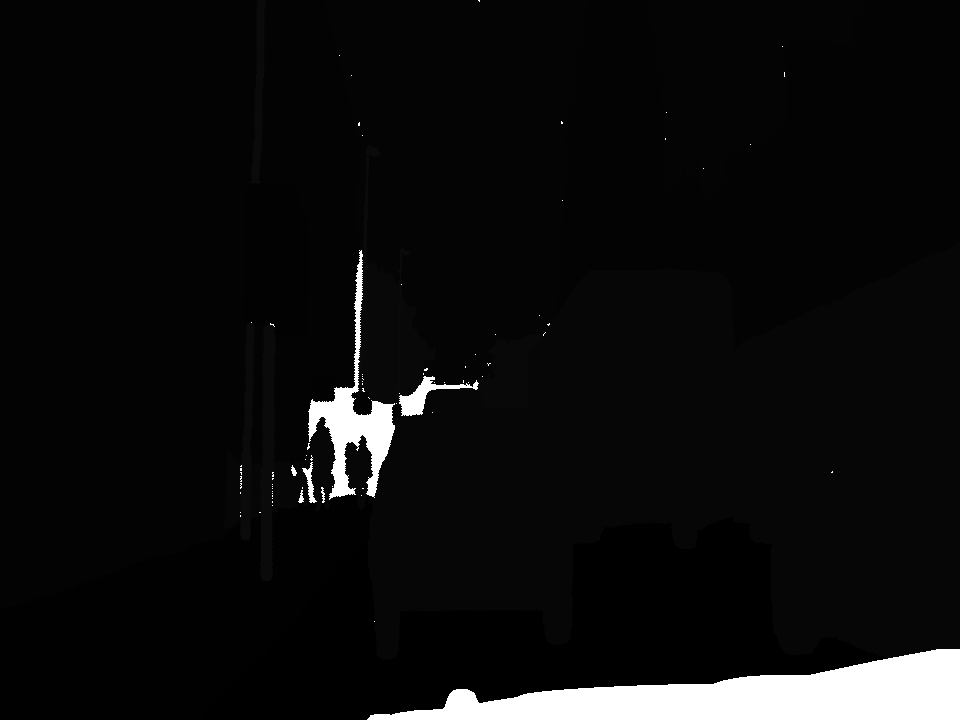

In [23]:
Image.open('./data_cap/Gray_data/0001TP_006690.png')